In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Applications of Eigendecomposition and SVD

## PCA using Eigendecomposition and SVD
* The purpose of PCA is to find a set of basis vectors for a dataset that point in the  direction that maximizes covariation across the variables
* Imagine that an $N$-D dataset exists in an $N$-D space with each data point being a coordinate in that space.
  - This is sensible when you think about storing the data in a matrix with $N$ observations (each row is an observation) of $M$ features (each column is a feature, also called a variable or measurement)
  - The data lives in $\mathbb{R}^M$ and comprises $N$ vectors or coordinates
---
* The Goal of PCA is to find a new set of basis vectors such that the linear relationships across the variables are maximally aligned with the basis vectors.
* Importantly, PCA has a constraint that the new basis vectors are orthogonal rotations of the original basis vectors

## 
The Math of PCA
* PCA combines the statistical concept of variance with the linear algebra concept of linear weighted combination.
* Variance is a measure of dispersion of a dataset around its average value.
* PCa makes the assumption that variance is good, and directions in the data space that have more variance are more important (that is, variance == relevance)
* But in PCA we are not simply concerned with the variance within one variable; instead we want to find the linear weighted combination across all variables that maximizes variance of that component (A *component* is a linear-weighted combination of variables)

---
- Matrix $\mathbf{X}$ is our data matrix (a tall, full column-rank matrix of observations by features), and $w$ is the vector of weights. Our goal in PCA is to find a set of weights in $w$ such that $\mathbf{X}w$ has maximal variance. Variance is a scalar, so we can write that down as:

$\lambda = \lVert\mathbf{X}w\rVert^2$

The squared vector norm is actually the same thing as variance when the data is mean-centered (that is, each data variable has a mean of zero). The scaling factor of $\frac{1}{N-1}$ is omitted as it doesnt affect the solution to the optimization problem

The problem is, you can simply set $w$ to huge numbers; the bigger the weights, the bigger the variance. The solution is to scale the norm of the weighed combination of data variables by the norm of the weights:

$\lambda = \frac{\lVert\mathbf{X}w\rVert^2}{\lVert w\rVert^2}$

Now we have a ratio of two vector norms. We can expand those norms into dot products to gain some insight into the equation

$\lambda = w^T\mathbf{X}^T\mathbf{X}w/w^Tw$

Taking $\mathbf{C}=\mathbf{X}^T\mathbf{X}$

$\lambda = w^T\mathbf{C}w/w^Tw$

We've now discovered that the solution to PCA is the same as the solution to finding the directional vector that maximizes the *normalized* quadratic form (the vector norm is the normalization term) of the data covariance matrix.

The linear algebra approach to solving this problem is to consider not just a single vector solution but an entier set of solutions. Thus we rewrite the equation using matirx $\mathbf{W}$ instead of vector $w$. Therefore we multiply by the inverse:


$\Lambda = (\mathbf{W}^T\mathbf{W})^{-1}\mathbf{W}^T\mathbf{CW}$

$\Lambda = (\mathbf{W}^T\mathbf{W})^{-1}\mathbf{W}^T\mathbf{CW}$

$\Lambda = (\mathbf{W}^{-1}\mathbf{W}^{-T})\mathbf{W}^T\mathbf{CW}$

$\Lambda = \mathbf{W}^{-1}\mathbf{CW}$

$\mathbf{W}\Lambda = \mathbf{CW}$

* We've discovered the solution to PCA is to perform an eigendecomposition on the data covariance matrix. The eigenvectors are the weights of the data variables, and their corresponding eigenvalues are the variances of the data along each direction (each column of $\mathbf{W}$)
* Because covariance matrices are symmetric, their eigenvectors and therefore principal components are orthogonal. This has important applications for the appropriateness of PCA for data analysis.$\Lambda = (\mathbf{W}^T\mathbf{W})^{-1}\mathbf{W}^T\mathbf{CW}$

## Steps of PCA
1. Compute the covariance matrix of the data. The resulting covariance matirx will be features-by-features. Each feature in the data must be mean-centered prior to computing covariance.
2. Take the eigendecomposition of that covariance matrix
3. Sort the eigenvalues descending by magnitude, and sort the eigenvalues accordingly. eigenvalues of the PCA are sometimes called *latent factor scores*
4. Compute the 'component scores' as the weighted combination of all data features, where the eigenvector provides the weights. the eigenvector associated with the largest eigenvalue is the 'most important' component, meaning the one with the largest variance.
5. convert the eigenvalues to percent variance explained to facilitate interpretation.

## PCA via SVD
PCA can also be done via SVD:
* Take the SVD of the covariance matrix. the procedure is identical to that previously described, because SVD and eigendecomposition are the same decomposition for covariance matrices
* Take the SVD of the data matrix directly. In this case, the right singular vectors (matrix $\mathbf{V}$) are equivalent to the eigenvectors of the covariance matrix .
  - the data must be mean-centered before computing the SVD.
  - The square root of the singular values is equivalent to the eigenvalues of the covariance matrix

# Linear Discriminant Analysis

Linear Discriminant Analysis (LDA) is a multivariate classification technique that is often used in ML and statistics. 

---
The goal of LDA is to find a direction in the data space that maximally separates categories of data.
---

* LDA will find basis vectors in the data space that maximally separate the two categories.

* An example problem dataset is shown in graph A. It is visually obvious that the two categories are separable, but they are not separable on either of the data axes alone—that is clear from visual inspection of the marginal distributions.
* Graph B shows the same data but in the LDA space. Now the classification is simple—observations with negative values on axis-1 are labeled category “0” and any observations with positive values on axis 1 are labeled category “1.” The data is completely inseparable on axis 2, indicating that one dimension is sufficient for accurate categorization in this dataset.
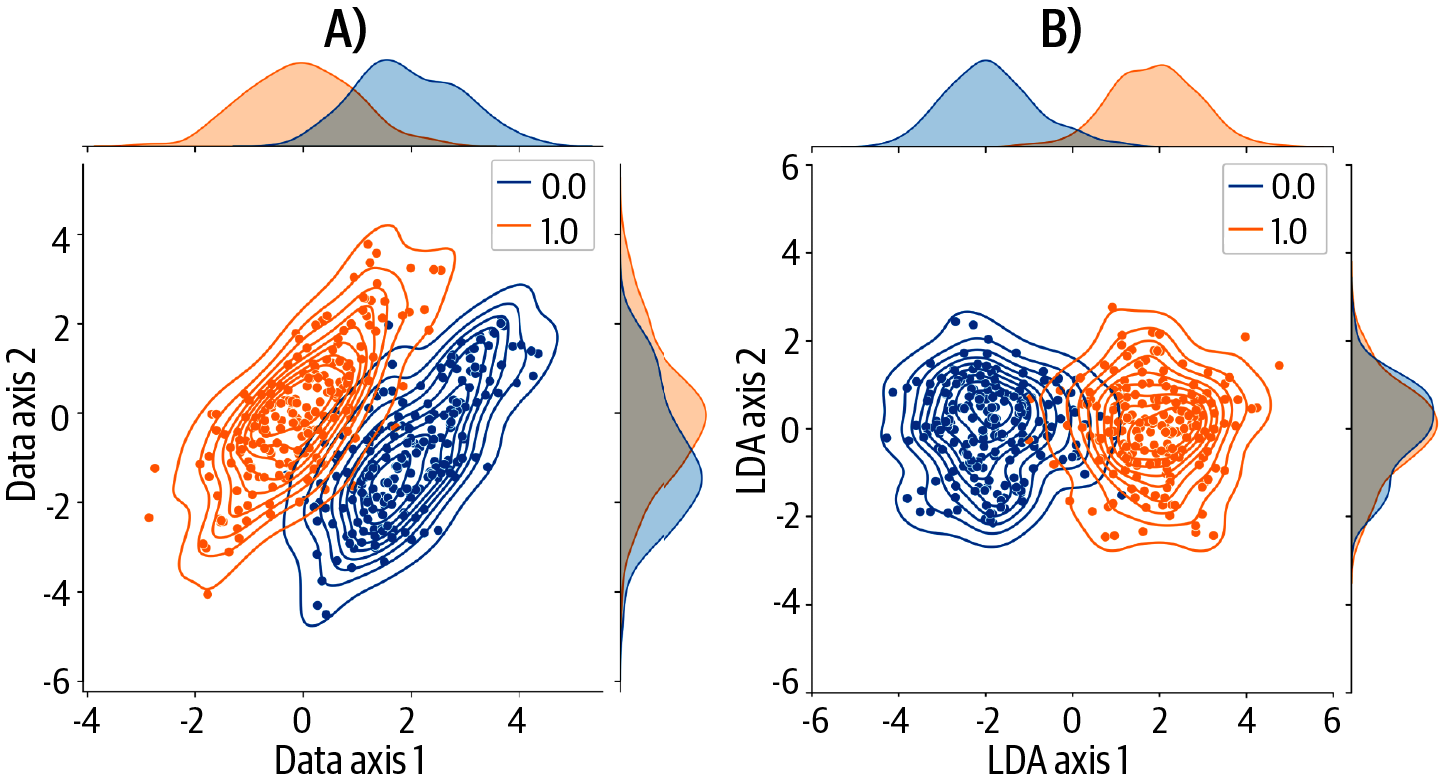

* How does it work?
* It is straightforward and based on generalized eigendecomposition
* Let's begin with the objective function: our goal is to find a set of weights such that the weighed combination of variables maximally separates the categories. That objective function can be written similaryly as with the PCA objective function:

$\lambda = \lVert\mathbf{X}_Bw\rVert^2/\lVert\mathbf{X}_Ww\rVert^2$

* We want to find a set of feature weights $w$ that maximizes the ratio of the variance of data feature $\mathbf{X}_B$ to the variance of data feature $\mathbf{X}_W$. Notice that the same weights are applied to all data observations.

* First we'll expand $\lVert\mathbf{X}_Bw\rVert^2$ to $w^T\mathbf{X}_B^T\mathbf{X}_Bw$ and express this as $w^T\mathbf{C}_Bw$. Second, consider a set of solution instead of one solution; third, replace the division with multiplication of the inverse

$\Lambda = (\mathbf{W}^T\mathbf{C}_W\mathbf{W})^{-1}\mathbf{W}^T\mathbf{C}_B\mathbf{W}$

$\Lambda = \mathbf{W}^{-1}\mathbf{C}_W^{-1}\mathbf{W}^{-T}\mathbf{W}^T\mathbf{C}_B\mathbf{W}$

$\Lambda = \mathbf{W}^{-1}\mathbf{C}_W^{-1}\mathbf{C}_B\mathbf{W}$

$\mathbf{W}\Lambda = \mathbf{I}\mathbf{C}_W^{-1}\mathbf{C}_B\mathbf{W}$

$\mathbf{C}_W\mathbf{W\Lambda}=\mathbf{C}_B\mathbf{W}$

* So the solution to LDA comes from a generalized eigendecomposition on two covariance matrices.
* The eigenvectors are the weights, and the generalized eigenvalues are the variance ratios of each component

---
* Which data features are used to construct $\mathbf{X}_B$ and $\mathbf{X}_W$?
* There are different ways of implementing that formula, depending on the nature of the problem and the specific goal of the analysis.
* But in a typical LDA model, the $\mathbf{X}_B$ comes from the between-category covariance while the $\mathbf{X}_W$ comes from the within-category covariance
* The within category covariance is simply the average of the covariances of the data samples within each class.
* The between category covariance comes from creating a new data matrix comprising the feature averages within each class. 

In [182]:
from ucimlrepo import fetch_ucirepo 

#import data
ISE = fetch_ucirepo(id=247) 

# features and targets
X = ISE.data.features
y = ISE.data.targets
X['ISE1']=X.iloc[:,2]
#meta data
print(ISE.variables)

      name     role        type demographic description units missing_values
0     date  Feature        Date        None        None  None             no
1      ISE  Feature  Continuous        None        None  None             no
2      ISE  Feature  Continuous        None        None  None             no
3       SP  Feature      Binary        None        None  None             no
4      DAX  Feature  Continuous        None        None  None             no
5     FTSE  Feature  Continuous        None        None  None             no
6   NIKKEI  Feature  Continuous        None        None  None             no
7  BOVESPA  Feature  Continuous        None        None  None             no
8       EU  Feature  Continuous        None        None  None             no
9       EM  Feature  Continuous        None        None  None             no


In [184]:
X.head()

,date,ISE1,ISE1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,5-Jan-09,0.035754,0.035754,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,6-Jan-09,0.025426,0.025426,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,7-Jan-09,-0.028862,-0.028862,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,8-Jan-09,-0.062208,-0.062208,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,9-Jan-09,0.009860,0.009860,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


<Axes: >

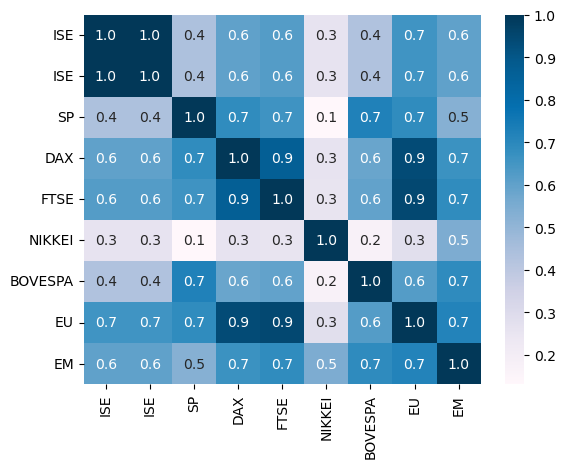

In [102]:
# plt.subplots(figsize=(20,10))
# plt.plot(X.date,X.ISE,label='ISE',c='b')
# plt.plot(X.date,X.FTSE,label='FTSE',c='r')
# plt.plot(X.date,X.DAX,label='DAX',c='g')
# plt.plot(X.date,X.NIKKEI,label='NIKKEI',c='k')
# plt.plot(X.date,X.EM,label='EM',c='C1')
import seaborn as sns
# correlation matrix
sns.heatmap(X.corr(numeric_only=True),cmap='PuBu',annot=True,fmt='.1f')

# covariance matrix
# plt.imshow(np.cov(X.select_dtypes(include=np.number).T),cmap='Greens')

In [166]:
from sklearn.preprocessing import scale
import pandas as pd
X_scale = X.iloc[:,1:]-np.mean(X.iloc[:,1:],axis=0)

In [170]:
cov = X_scale.cov()

ev, evecs = np.linalg.eig(cov)

In [172]:
order = np.argsort(ev)[::-1]
evo = np.take(ev,order)
evecso = np.take(evecs.T,order).T

In [174]:
evo[:2]

array([0.00115074, 0.00025389])

In [162]:
order

array([0, 1, 2, 3, 4, 8, 7, 6, 5], dtype=int64)

In [176]:
np.var(X_scale.iloc[:,1:],axis=0)

ISE        0.000264
SP         0.000198
DAX        0.000212
FTSE       0.000160
NIKKEI     0.000220
BOVESPA    0.000248
EU         0.000168
EM         0.000110
dtype: float64